In [3]:
from functions import *

%load_ext autoreload
%autoreload 2

In [4]:
if os.path.exists('CTRL_common_res'):
    pass
else:
    os.mkdir('CTRL_common_res')

Read all the files

In [5]:
event_param_cell1 = pd.read_csv('Cell 1 ctrl\event_param.csv')
event_param_cell2 = pd.read_csv('Cell 2 ctrl\event_param.csv')
event_param_cell3 = pd.read_csv('Cell 3 ctrl\event_param.csv')
event_param_cell4 = pd.read_csv('Cell 4 ctrl\event_param.csv')
# event_param_cell5 = pd.read_csv('Cell 5 ctrl\event_param.csv')
# event_param_cell6 = pd.read_csv('Cell 6 ctrl\event_param.csv')
# event_param_cell7 = pd.read_csv('Cell 7 ctrl\event_param.csv')

In [6]:
frames = [event_param_cell1, event_param_cell2, event_param_cell3, event_param_cell4]#event_param_cell5, event_param_cell6, event_param_cell7]
result = pd.concat(frames)

In [7]:
result_ctrl = result[result['series'] == 'CTRL']
result_gaba1 = result[result['series'] == 'GABA1']
result_gaba5 = result[result['series'] == 'GABA5']

In [8]:
frames2 = [result_ctrl, result_gaba1, result_gaba5]
result_3ser = pd.concat(frames2)
del result_3ser['Unnamed: 0']

In [9]:
result_3ser

,event_idx,spike_time,amplitudes,tau_decay,rise_rate_10_90,series,sweep
0,978.0,0.980,40.336,5.387,1.044,CTRL,0
1,1187.0,1.189,36.112,6.212,3.884,CTRL,0
2,2124.0,2.127,60.741,7.020,3.319,CTRL,0
3,2768.0,2.772,34.037,7.131,2.405,CTRL,0
4,2956.0,2.961,39.536,10.784,0.716,CTRL,0
...,...,...,...,...,...,...,...
1603,1247573.0,1249.569,58.180,21.805,1.233,GABA5,124
1604,1248917.0,1250.915,33.302,9.557,0.700,GABA5,125
1605,1253913.0,1255.919,41.070,24.336,2.693,GABA5,125
1606,1254681.0,1256.688,42.470,31.267,0.039,GABA5,125


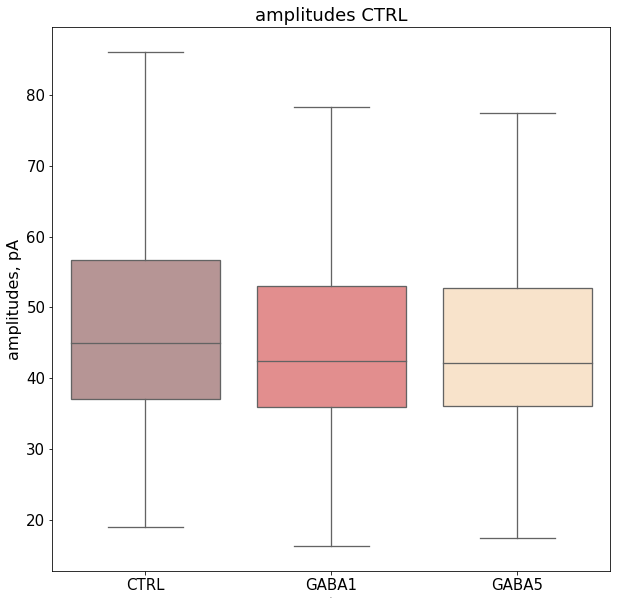

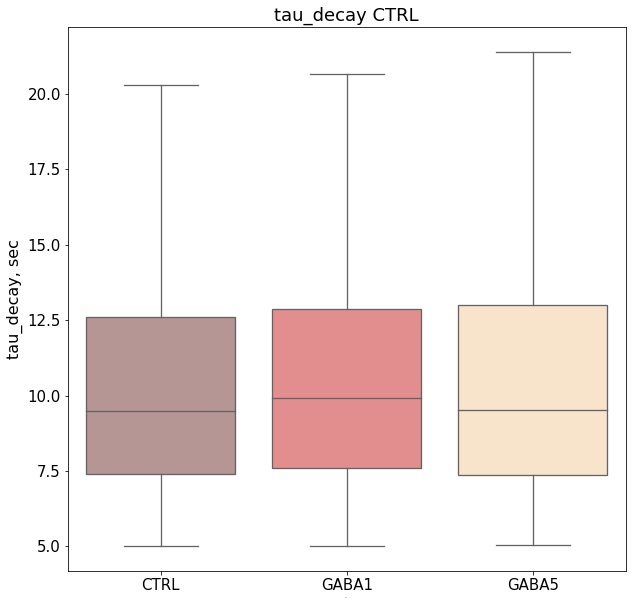

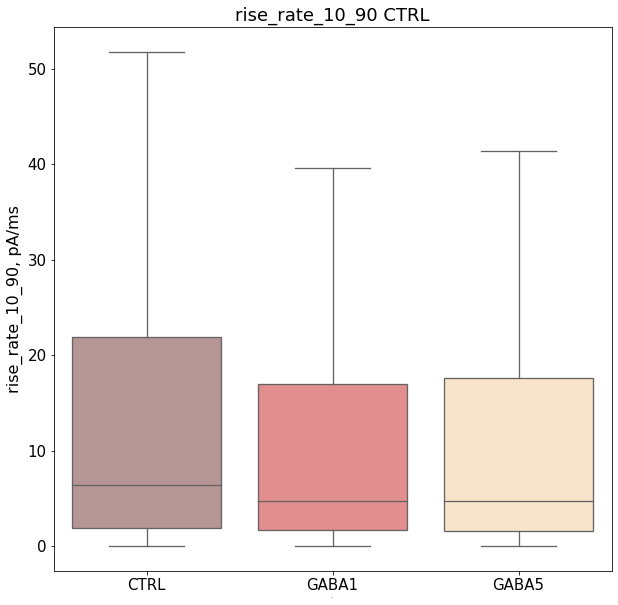

In [13]:
parametres = ['amplitudes', 'tau_decay', 'rise_rate_10_90']
lparametres = ['amplitudes, pA', 'tau_decay, sec', 'rise_rate_10_90, pA/ms']

for p, l in zip(parametres, lparametres):
    plt.figure(figsize = (10, 10))
    ax = sns.boxplot(x='series', y=p, data=result_3ser, palette  = ['rosybrown', 'lightcoral', 'bisque', 'paleturquoise'],
                     linewidth = 1.3, showfliers=False)
    #ax.set_title(p)
    ax.set_title(p + ' CTRL', fontsize=18)
    ax.set_xlabel('series', fontsize=0)
    ax.set_ylabel(l, fontsize=16);
    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.savefig('CTRL_common_res/'f"{p}.png")
    plt.savefig('CTRL_common_res/'f"{p}.pdf")
plt.show();

In [38]:
temp_pd1 = result_3ser[result_3ser.series == 'CTRL'].describe().round(3)

In [41]:
temp_pd1[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,2036.000,2036.000,2036.000
mean,51.765,10.904,15.509
std,29.393,5.327,21.622
min,19.004,5.010,0.005
25%,37.134,7.388,1.917
50%,44.974,9.503,6.418
75%,56.706,12.620,21.911
max,433.792,39.575,219.906


In [42]:
temp_pd2 = result_3ser[result_3ser.series == 'GABA1'].describe().round(3)

In [43]:
temp_pd2[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,1260.000,1260.000,1260.000
mean,47.492,11.175,12.003
std,21.788,5.334,16.041
min,16.353,5.020,0.011
25%,36.018,7.587,1.703
50%,42.464,9.928,4.685
75%,53.058,12.862,16.979
max,304.523,39.512,121.856


In [44]:
temp_pd3 = result_3ser[result_3ser.series == 'GABA5'].describe().round(3)

In [45]:
temp_pd3[['amplitudes', 'tau_decay', 'rise_rate_10_90']]

,amplitudes,tau_decay,rise_rate_10_90
count,1047.000,1047.000,1047.000
mean,51.292,11.215,13.865
std,41.987,5.646,21.370
min,17.484,5.047,0.012
25%,36.046,7.366,1.636
50%,42.175,9.527,4.694
75%,52.726,12.992,17.567
max,590.827,38.671,185.688


Cumulative distributions

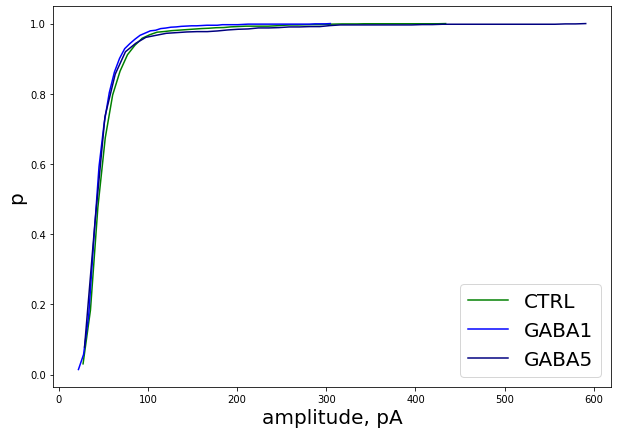

In [17]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_amplitude_p.png")
plt.savefig('CTRL_common_res/'"cum_amplitude_p.pdf")
plt.show()

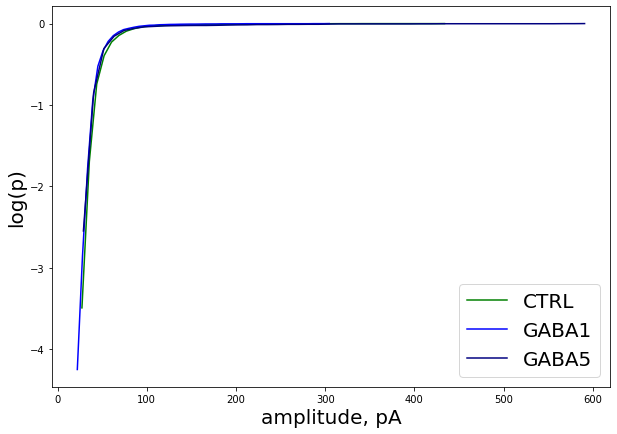

In [18]:
count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'CTRL']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], np.log(cdf), color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA1']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(result_3ser[result_3ser['series'] == 'GABA5']['amplitudes']), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], np.log(cdf), color = 'navy', label = 'GABA5')

plt.ylabel('log(p)', fontdict={'fontsize': 20})
plt.xlabel('amplitude, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_amplitude_logp.png")
plt.savefig('CTRL_common_res/'"cum_amplitude_logp.pdf")
plt.show()

In [19]:
cum_tau_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['tau_decay'])]
cum_tau_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['tau_decay'])]
cum_tau_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['tau_decay'])]

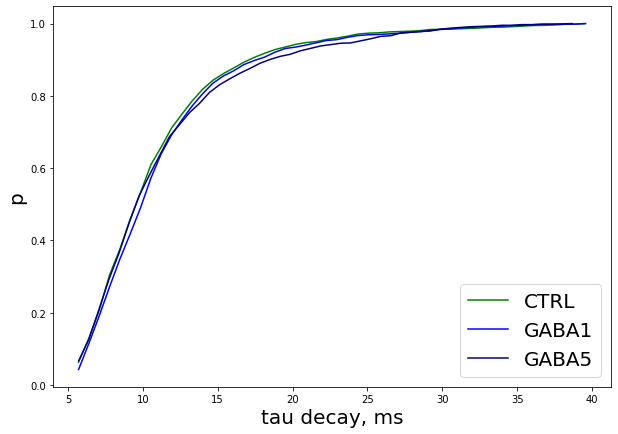

In [20]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('tau decay, ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_tau_p.png")
plt.savefig('CTRL_common_res/'"cum_tau_p.pdf")
plt.show()

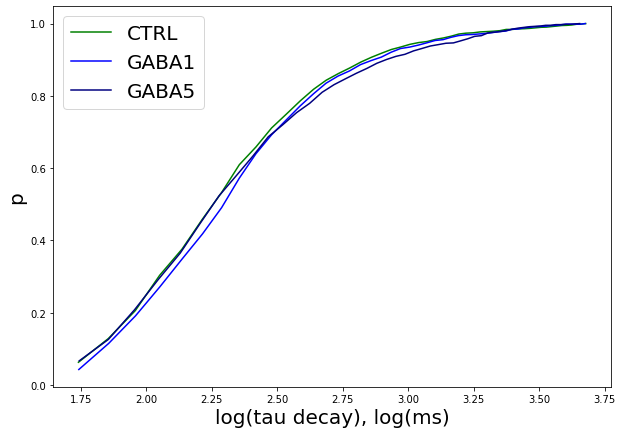

In [21]:
count, bins_count = np.histogram(np.array(cum_tau_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_tau_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_tau_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(tau decay), log(ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_tau_logp.png")
plt.savefig('CTRL_common_res/'"cum_tau_logp.pdf")
plt.show()

In [22]:
cum_rise_ctrl = result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'CTRL']['rise_rate_10_90'])]
cum_rise_gaba1 = result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA1']['rise_rate_10_90'])]
cum_rise_gaba5 = result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'][np.isfinite(result_3ser[result_3ser['series'] == 'GABA5']['rise_rate_10_90'])]

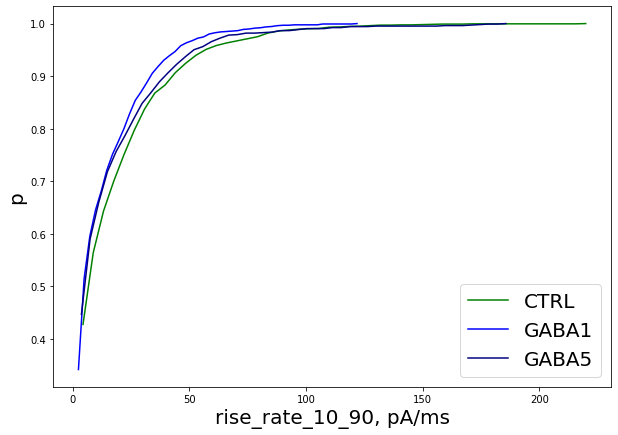

In [23]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('rise_rate_10_90, pA/ms', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_rise_p.png")
plt.savefig('CTRL_common_res/'"cum_rise_p.pdf")
plt.show()

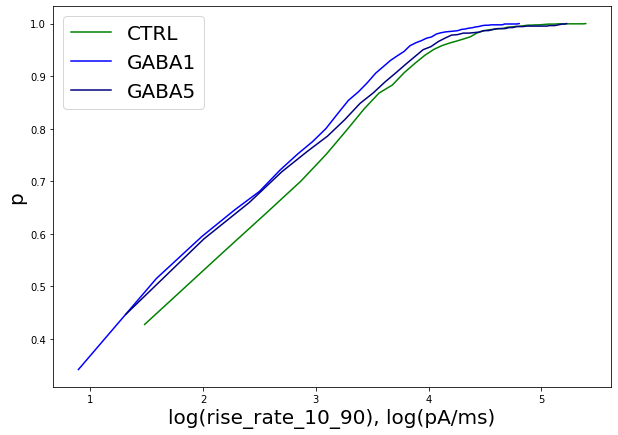

In [24]:
count, bins_count = np.histogram(np.array(cum_rise_ctrl), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(np.log(bins_count[1:]), cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(cum_rise_gaba1), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(cum_rise_gaba5), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(np.log(bins_count[1:]), cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('log(rise_rate_10_90), log(pA/ms)', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_rise_logp.png")
plt.savefig('CTRL_common_res/'"cum_rise_logp.pdf")
plt.show()

In [25]:
electric_cell1_param = pd.read_csv('Cell 1 ctrl\electric_cell_param.csv')
electric_cell2_param = pd.read_csv('Cell 2 ctrl\electric_cell_param.csv')
electric_cell3_param = pd.read_csv('Cell 3 ctrl\electric_cell_param.csv')
electric_cell4_param = pd.read_csv('Cell 4 ctrl\electric_cell_param.csv')
# electric_cell5_param = pd.read_csv('Cell 5 ctrl\electric_cell_param.csv')
# electric_cell6_param = pd.read_csv('Cell 6 ctrl\electric_cell_param.csv')
# electric_cell7_param = pd.read_csv('Cell 7 ctrl\electric_cell_param.csv')

In [26]:
r_s_cell1 = np.array(electric_cell1_param['R_s, Mohm'])
r_s_cell2 = np.array(electric_cell2_param['R_s, Mohm'])
r_s_cell3 = np.array(electric_cell3_param['R_s, Mohm'])
r_s_cell4 = np.array(electric_cell4_param['R_s, Mohm'])

# r_s_cell5 = np.array(electric_cell5_param['R_s, Mohm'])
# r_s_cell6 = np.array(electric_cell6_param['R_s, Mohm'])
# r_s_cell7 = np.array(electric_cell7_param['R_s, Mohm'])

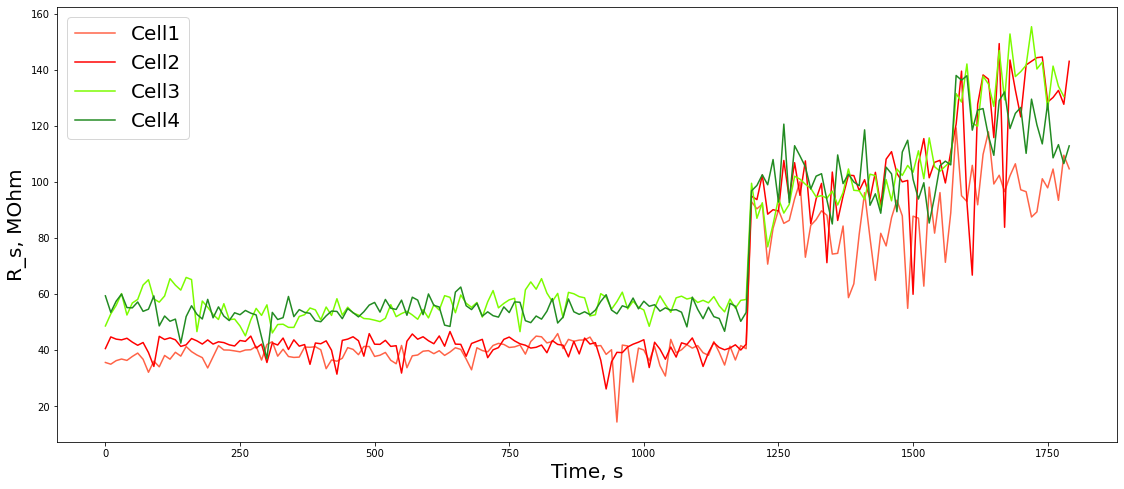

In [27]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell1))], r_s_cell1, color='tomato', label = 'Cell1')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell2))], r_s_cell2, color='red', label = 'Cell2')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell3))], r_s_cell3, color='lawngreen', label = 'Cell3')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell4))], r_s_cell4, color='forestgreen', label = 'Cell4')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell5))], r_s_cell5, color='navy', label = 'Cell5')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell6))], r_s_cell6, color='blueviolet', label = 'Cell6')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell7))], r_s_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('R_s, MOhm', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"R_s_common.png")
plt.savefig('CTRL_common_res/'"R_s_common.pdf")
plt.show()

In [28]:
c_cell1 = np.array(electric_cell1_param['C, pF'])
c_cell2 = np.array(electric_cell2_param['C, pF'])
c_cell3 = np.array(electric_cell3_param['C, pF'])
c_cell4 = np.array(electric_cell4_param['C, pF'])
# c_cell5 = np.array(electric_cell5_param['C, pF'])
# c_cell6 = np.array(electric_cell6_param['C, pF'])
# c_cell7 = np.array(electric_cell7_param['C, pF'])

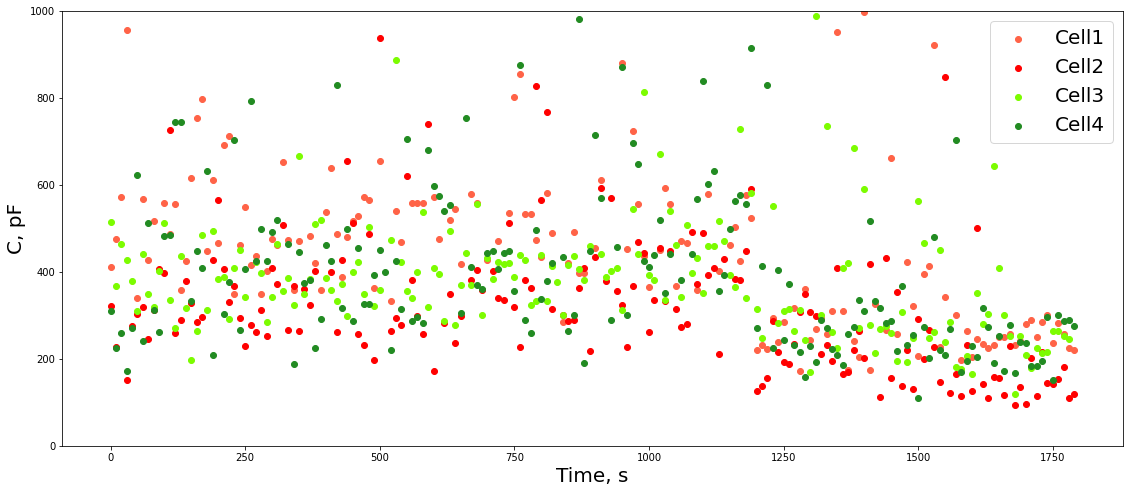

In [29]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell1))], c_cell1, color='tomato', label = 'Cell1')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell2))], c_cell2, color='red', label = 'Cell2')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell3))], c_cell3, color='lawngreen', label = 'Cell3')
plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell4))], c_cell4, color='forestgreen', label = 'Cell4')
# plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell5))], c_cell5, color='navy', label = 'Cell5')
# plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell6))], c_cell6, color='blueviolet', label = 'Cell6')
# plt.scatter([k * 10 + 1 / SamplingRate for k in range(len(r_s_cell7))], c_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('C, pF', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.ylim(0,1000)
plt.show()

In [30]:
baseline_cell1_param = pd.read_csv(r'Cell 1 ctrl\baseline_param.csv')
baseline_cell2_param = pd.read_csv(r'Cell 2 ctrl\baseline_param.csv')
baseline_cell3_param = pd.read_csv(r'Cell 3 ctrl\baseline_param.csv')
baseline_cell4_param = pd.read_csv(r'Cell 4 ctrl\baseline_param.csv')
# baseline_cell5_param = pd.read_csv(r'Cell 5 ctrl\baseline_param.csv')
# baseline_cell6_param = pd.read_csv(r'Cell 6 ctrl\baseline_param.csv')
# baseline_cell7_param = pd.read_csv(r'Cell 7 ctrl\baseline_param.csv')

In [31]:
i_h_cell1 = np.array(baseline_cell1_param['Ihold, pA'])
i_h_cell2 = np.array(baseline_cell2_param['Ihold, pA'])
i_h_cell3 = np.array(baseline_cell3_param['Ihold, pA'])
i_h_cell4 = np.array(baseline_cell4_param['Ihold, pA'])

# i_h_cell5 = np.array(baseline_cell5_param['Ihold, pA'])
# i_h_cell6 = np.array(baseline_cell6_param['Ihold, pA'])
# i_h_cell7 = np.array(baseline_cell7_param['Ihold, pA'])

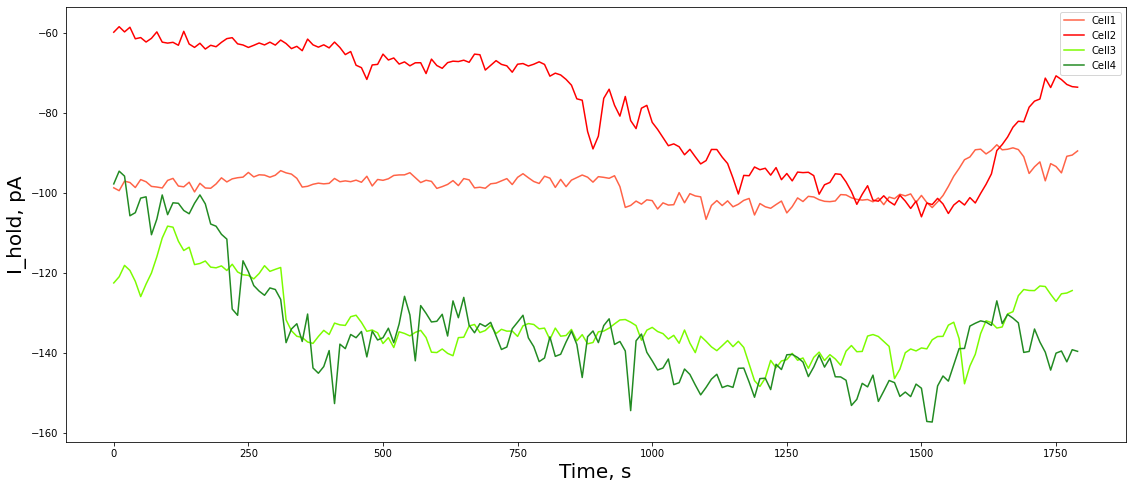

In [32]:
SamplingRate = 998.4026410869866

plt.figure(figsize=(19,8))
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell1))], i_h_cell1, color='tomato', label = 'Cell1')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell2))], i_h_cell2, color='red', label = 'Cell2')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell3))], i_h_cell3, color='lawngreen', label = 'Cell3')
plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell4))], i_h_cell4, color='forestgreen', label = 'Cell4')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell5))], i_h_cell5, color='navy', label = 'Cell5')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell6))], i_h_cell6, color='blueviolet', label = 'Cell6')
# plt.plot([k * 10 + 1 / SamplingRate for k in range(len(i_h_cell7))], i_h_cell7, color='fuchsia', label = 'Cell7')

plt.xlabel('Time, s', fontdict={'fontsize': 20})
plt.ylabel('I_hold, pA', fontdict={'fontsize': 20})
plt.legend(fontsize=10)
plt.savefig('CTRL_common_res/'"I_h_common.png")
plt.savefig('CTRL_common_res/'"I_h_common.pdf")
plt.show()

In [33]:
spont_freq_cell1 = pd.read_csv(r'Cell 1 ctrl\spont_freqs.csv')
spont_freq_cell2 = pd.read_csv(r'Cell 2 ctrl\spont_freqs.csv')
spont_freq_cell3 = pd.read_csv(r'Cell 3 ctrl\spont_freqs.csv')
spont_freq_cell4 = pd.read_csv(r'Cell 4 ctrl\spont_freqs.csv')
# spont_freq_cell5 = pd.read_csv(r'Cell 5 ctrl\spont_freqs.csv')
# spont_freq_cell6 = pd.read_csv(r'Cell 6 ctrl\spont_freqs.csv')
# spont_freq_cell7 = pd.read_csv(r'Cell 7 ctrl\spont_freqs.csv')

In [34]:
ar_ctrl = [spont_freq_cell1[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2]] #spont_freq_cell5[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'CTRL'].values.T[1:][:-2]]
spont_fr_ctrl = []
for ar in ar_ctrl:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_ctrl.append(ar[k][i])
spont_fr_ctrl_no_nan = [item for item in spont_fr_ctrl if not(math.isnan(item)) == True]

In [35]:
ar_gaba1 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2]] #spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA1'].values.T[1:][:-2]]
spont_fr_gaba1 = []
for ar in ar_gaba1:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba1.append(ar[k][i])
spont_fr_gaba1_no_nan = [item for item in spont_fr_gaba1 if not(math.isnan(item)) == True]

In [36]:
ar_gaba5 = [spont_freq_cell1[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell2[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell3[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], 
           spont_freq_cell4[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2]] #spont_freq_cell5[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell6[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2], spont_freq_cell7[spont_freq_cell1['ser'] == 'GABA5'].values.T[1:][:-2]]
spont_fr_gaba5 = []
for ar in ar_gaba5:
    for k in range(len(ar)):
        for i in range(len(ar[k])):
            spont_fr_gaba5.append(ar[k][i])
spont_fr_gaba5_no_nan = [item for item in spont_fr_gaba5 if not(math.isnan(item)) == True]

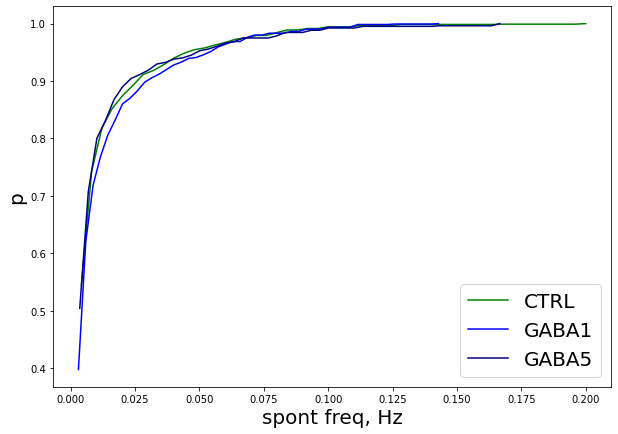

In [37]:
count, bins_count = np.histogram(np.array(np.array(spont_fr_ctrl_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1, figsize=(10, 7))
plt.plot(bins_count[1:], cdf, color = 'green', label = 'CTRL')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba1_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'blue', label = 'GABA1')

count, bins_count = np.histogram(np.array(np.array(spont_fr_gaba5_no_nan)), bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color = 'navy', label = 'GABA5')

plt.ylabel('p', fontdict={'fontsize': 20})
plt.xlabel('spont freq, Hz', fontdict={'fontsize': 20})
plt.legend(fontsize=20)
plt.savefig('CTRL_common_res/'"cum_spont_freq.png")
plt.savefig('CTRL_common_res/'"cum_spont_freq.pdf")
plt.show()